https://hackernoon.com/understanding-architecture-of-lstm-cell-from-scratch-with-code-8da40f0b71f4

https://www.youtube.com/watch?v=iMIWee_PXl8

# RNN - LSTM

In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Preparación de datos

In [2]:
Data = [[[(i+j)/100] for i in range (5)] for j in range (100)]

'''
[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]],
 [[3], [4], [5], [6], [7]],
 [[4], [5], [6], [7], [8]],
 [[5], [6], [7], [8], [9]],
 [[6], [7], [8], [9], [10]],....

'''

data = np.array(Data, dtype=float)
data

array([[[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]],

       [[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]],

       [[0.02],
        [0.03],
        [0.04],
        [0.05],
        [0.06]],

       [[0.03],
        [0.04],
        [0.05],
        [0.06],
        [0.07]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.05],
        [0.06],
        [0.07],
        [0.08],
        [0.09]],

       [[0.06],
        [0.07],
        [0.08],
        [0.09],
        [0.1 ]],

       [[0.07],
        [0.08],
        [0.09],
        [0.1 ],
        [0.11]],

       [[0.08],
        [0.09],
        [0.1 ],
        [0.11],
        [0.12]],

       [[0.09],
        [0.1 ],
        [0.11],
        [0.12],
        [0.13]],

       [[0.1 ],
        [0.11],
        [0.12],
        [0.13],
        [0.14]],

       [[0.11],
        [0.12],
        [0.13],
        [0.14],
        [0.15]],

       [[0.12],


In [3]:
Target = [(i+5)/100 for i in range(100)]
'''
[0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,....

'''
target = np.array(Target, dtype=float)
target.shape

(100,)

In [0]:
#                                  train_test_split(*arrays, **options)
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=42)

### RNN Model

In [5]:
model = Sequential()

# LSTM(units, activation='tanh', recurrent_activation='hard_sigmoid', 
#      use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal',
#      bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, 
#      recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
#      kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, 
#      recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, 
#      go_backwards=False, stateful=False, unroll=False, **kwargs)


model.add(LSTM((1), batch_input_shape = (None,None,1), return_sequences = True))
model.add(LSTM((1), return_sequences = False))

#model.add(LSTM((1), activation='sigmoid', dropout=0.3, recurrent_dropout=0.2, return_sequences=False))  

W0712 02:21:04.671928 140167825508224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 02:21:04.717792 140167825508224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 02:21:04.724888 140167825508224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [6]:
model.compile(loss='mean_squared_error', optimizer = 'Adadelta', metrics = ['accuracy'])

#model.compile(loss='mean_absolute_error', optimizer = 'Adadelta', metrics = ['accuracy'])
#model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])
#model.compile(loss='mean_absolute_error', optimizer = 'RMSprop', metrics = ['accuracy'])

W0712 02:21:05.171054 140167825508224 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 1)           12        
_________________________________________________________________
lstm_2 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train,y_train,epochs=382, validation_data=(x_test, y_test))

Train on 75 samples, validate on 25 samples
Epoch 1/382
75/75 [==============================] - 0s 1ms/step - loss: 8.2817e-04 - acc: 0.0133 - val_loss: 7.8710e-04 - val_acc: 0.0000e+00
Epoch 2/382
75/75 [==============================] - 0s 1000us/step - loss: 8.2708e-04 - acc: 0.0133 - val_loss: 7.7737e-04 - val_acc: 0.0000e+00
Epoch 3/382
75/75 [==============================] - 0s 1ms/step - loss: 8.2377e-04 - acc: 0.0133 - val_loss: 7.8889e-04 - val_acc: 0.0000e+00
Epoch 4/382
75/75 [==============================] - 0s 1ms/step - loss: 8.3566e-04 - acc: 0.0133 - val_loss: 7.6950e-04 - val_acc: 0.0000e+00
Epoch 5/382
75/75 [==============================] - 0s 1ms/step - loss: 8.2923e-04 - acc: 0.0133 - val_loss: 7.9042e-04 - val_acc: 0.0000e+00
Epoch 6/382
75/75 [==============================] - 0s 974us/step - loss: 8.3067e-04 - acc: 0.0133 - val_loss: 7.7404e-04 - val_acc: 0.0000e+00
Epoch 7/382
75/75 [==============================] - 0s 998us/step - loss: 8.1924e-04 - acc: 

In [0]:
results = model.predict(x_test)

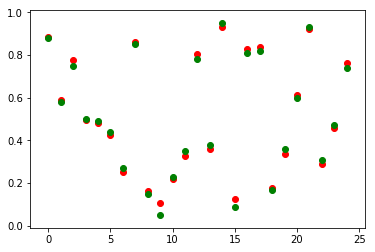

In [11]:
plt.scatter(range(25), results, c='red')
plt.scatter(range(25), y_test, c='green')
plt.show()

Revisamos una muestra

In [12]:
x_test[0:1]

array([[[0.83],
        [0.84],
        [0.85],
        [0.86],
        [0.87]]])

In [13]:
y_test[0:1]

array([0.88])

In [14]:
results[0:1]

array([[0.88517964]], dtype=float32)

Comprobamos con una nueva entrada completamente desconocida para el modelo.

In [15]:
n_test = np.array([[[2],
                    [4],
                    [6],
                    [8],
                    [10]]])/100 # Dividir en 100 para normalizar
n_test

array([[[0.02],
        [0.04],
        [0.06],
        [0.08],
        [0.1 ]]])

In [16]:
n_predict = model.predict(n_test)
n_predict*100

array([[12.7435665]], dtype=float32)

**Comentarios:** Durante este taller se utiliza una Red Neuronal Recurrente para predecir el número que sigue dado un conjunto de números, dada la entrada [2,4,6,8] se obtuvo 12.